In [1]:
from spotify_api_functions import *

In [2]:
spotify_token = get_token_and_spotify('e501f11ba57f4779afc1e3d3c92f2c01','ccae21b077444375a2cebe9f4815f2f8')
female_artists = get_artist_from_playlist(spotify_token, playlist_uri)
artists_attributes = get_artists_attributes(spotify_token,female_artists)


In [3]:
top_songs = get_artist_top_songs(spotify_token, female_artists)
song_features = get_song_features_artists(spotify_token,top_songs)    

retrying ...4secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


In [14]:
import pandas as pd

song_features_df = pd.concat(pd.DataFrame(l) for l in song_features)

In [222]:
song_features_df.reset_index(inplace = True)

In [234]:
song_features_df = song_features_df.drop(['index'],axis=1)

In [6]:
female_artists_uri = pd.DataFrame(female_artists)

In [30]:
column_names = ['acousticness', 'danceability','duration_ms',
                  'energy','instrumentalness','key','liveness',
                  'loudness','mode','speechiness','tempo',
                  'time_signature','valence']

song_features_df[column_names] = song_features_df[column_names].apply(pd.to_numeric)

In [31]:
song_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 0 to 9
Data columns (total 16 columns):
acousticness        496 non-null float64
artist_name         496 non-null object
danceability        496 non-null float64
duration_ms         496 non-null int64
energy              496 non-null float64
instrumentalness    496 non-null float64
key                 496 non-null int64
liveness            496 non-null float64
loudness            496 non-null float64
mode                496 non-null int64
song_names          496 non-null object
song_popularity     496 non-null int64
speechiness         496 non-null float64
tempo               496 non-null float64
time_signature      496 non-null int64
valence             496 non-null float64
dtypes: float64(9), int64(5), object(2)
memory usage: 65.9+ KB


In [7]:
female_artists_attributes = pd.DataFrame(artists_attributes)

In [301]:
#song_features_df.columns
#column names that have numerical values
features_to_plot = ['acousticness', 'danceability', 'duration_ms', 'energy',
                    'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
                    'speechiness', 'tempo', 'time_signature', 'valence']

In [20]:
#genres = list(female_artists_attributes['genres'])
f, axes = plt.subplots(3, 5)
for i in features_to_plot:
    
    

AttributeError: 'AxesSubplot' object has no attribute 'regplot'

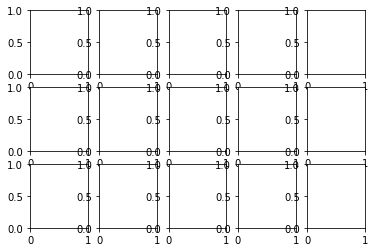

In [305]:
#creating subplots of the song attributes correlation to song popularity
#using the data set song_features_df --> the df with each song's audio features
f, axes = plt.subplots(3, 5)
sns.boxplot(x='acousticness', y="song_popularity", data=song_features_df, ax=axes[0,0])
sns.boxplot(  y="c", x= "a", data=df,  orient='v' , ax=axes[1])
axes[0,0].regplot(x='acousticness', y="song_popularity", data=song_features_df)
axes[0,0].set_title('Correlation between Accousticness and Popularity')
axes[0,1].regplot(x='danceability', y="song_popularity", data=song_features_df)
axes[0,1].set_title('Correlation between danceability and Popularity')
axes[0,2].regplot(x='duration_ms', y="song_popularity", data=song_features_df)
axes[0,2].set_title('Correlation between duration in ms and Popularity')
axes[0,3].regplot(x='energy', y="song_popularity", data=song_features_df)
axes[0,3].set_title('Correlation between Energy and Popularity')
axes[0,4].regplot(x='instrumentalness', y="song_popularity", data=song_features_df)
axes[0,4].set_title('Correlation between Instrumentalness and Popularity')
axes[1,0].regplot(x='key', y="song_popularity", data=song_features_df)
axes[1,0].set_title('Correlation between Key and Popularity')
axes[1,1].regplot(x='liveness', y="song_popularity", data=song_features_df)
axes[1,1].set_title('Correlation between Liveness and Popularity')
axes[1,2].regplot(x='loudness', y="song_popularity", data=song_features_df)
axes[1,2].set_title('Correlation between Loudness and Popularity')
axes[1,3].regplot(x='mode', y="song_popularity", data=song_features_df)
axes[1,3].set_title('Correlation between Mode and Popularity')
axes[1,4].regplot(x='speechiness', y="song_popularity", data=song_features_df)
axes[1,4].set_title('Correlation between Speechiness and Popularity')
axes[2,0].regplot(x='tempo', y="song_popularity", data=song_features_df)
axes[2,0].set_title('Correlation between Tempo and Popularity')
axes[2,1].regplot(x='time_signature', y="song_popularity", data=song_features_df)
axes[2,1].set_title('Correlation between Time Signature and Popularity')
axes[2,2].regplot(x='valence', y="song_popularity", data=song_features_df)
axes[2,2].set_title('Correlation between Valence and Popularity')
plt.show()

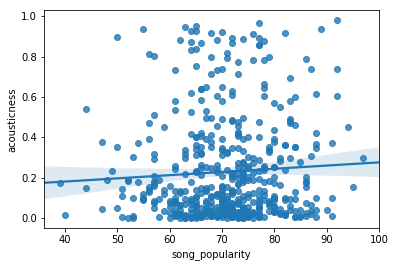

In [32]:
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
ax = sns.regplot(x="song_popularity", y="acousticness", data=song_features_df)



In [34]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x=song_features_df["song_popularity"], y=song_features_df["acousticness"])
slope, intercept, r_value, p_value, std_err

(0.0015830377140166134,
 0.11719117219183744,
 0.05876492875585183,
 0.1913539196217986,
 0.0012099248515390166)

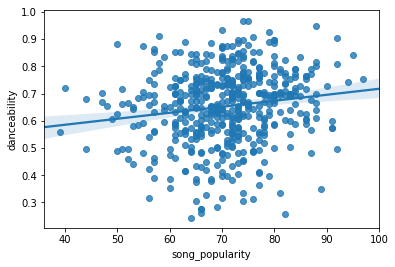

In [35]:
ax = sns.regplot(x="song_popularity", y="danceability", data=song_features_df)


In [36]:
song_features_df.corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,song_popularity,speechiness,tempo,time_signature,valence
acousticness,1.000000,-0.284332,0.034859,-0.659269,0.141654,0.008126,-0.129245,-0.480409,0.141679,0.058765,-0.122679,-0.111785,-0.199466,-0.261417
danceability,-0.284332,1.000000,-0.216271,0.247984,-0.060000,-0.006272,0.040734,0.246729,-0.123555,0.149311,0.104511,-0.096663,0.114959,0.446129
duration_ms,0.034859,-0.216271,1.000000,-0.080409,0.213844,0.060655,-0.039468,-0.127657,0.031669,-0.106623,-0.083042,0.008517,-0.028612,-0.229154
energy,-0.659269,0.247984,-0.080409,1.000000,-0.068750,0.007845,0.208176,0.723997,-0.120167,-0.070321,0.136479,0.083475,0.227571,0.510004
instrumentalness,0.141654,-0.060000,0.213844,-0.068750,1.000000,-0.013160,-0.040745,-0.222124,0.022491,-0.021239,0.011824,-0.027229,0.067358,-0.114986
key,0.008126,-0.006272,0.060655,0.007845,-0.013160,1.000000,-0.092650,-0.037413,-0.200429,0.075955,0.038286,0.030929,-0.014352,0.011816
liveness,-0.129245,0.040734,-0.039468,0.208176,-0.040745,-0.092650,1.000000,0.174883,-0.080043,0.025065,0.095532,0.040334,0.023433,0.165169
loudness,-0.480409,0.246729,-0.127657,0.723997,-0.222124,-0.037413,0.174883,1.000000,-0.090846,-0.042575,-0.001195,-0.001030,0.196177,0.460958
mode,0.141679,-0.123555,0.031669,-0.120167,0.022491,-0.200429,-0.080043,-0.090846,1.000000,-0.129531,-0.099833,0.076457,-0.061236,-0.088733
song_popularity,0.058765,0.149311,-0.106623,-0.070321,-0.021239,0.075955,0.025065,-0.042575,-0.129531,1.000000,0.016733,0.014962,-0.043390,-0.064681


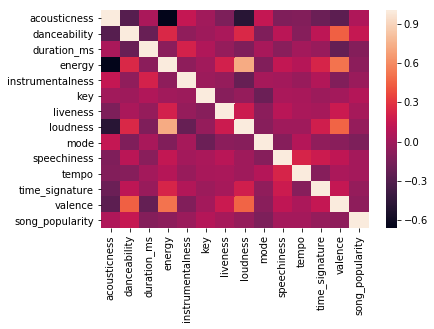

In [41]:
column_names_corr = ['acousticness', 'danceability', 'duration_ms',
                  'energy','instrumentalness','key','liveness',
                  'loudness','mode','speechiness','tempo',
                  'time_signature','valence','song_popularity']

ax = sns.heatmap(song_features_df[column_names_corr].corr())

In [42]:
song_features_df.to_csv('female_artists_song_features.csv')

In [45]:
female_artists_attributes.to_csv('female_artists_Attributes.csv')

In [47]:
song_features_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,song_popularity,speechiness,tempo,time_signature,valence
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,0.229118,0.653075,214452.633065,0.642187,0.004264,5.048387,0.173860,-5.907179,0.568548,70.703629,0.095036,119.784893,3.977823,0.476065
std,0.252895,0.138450,37229.123344,0.169950,0.034909,3.652269,0.138851,2.046472,0.495779,9.387875,0.084588,27.727130,0.249266,0.218724
min,0.000155,0.244000,131674.000000,0.104000,0.000000,0.000000,0.021500,-14.604000,0.000000,39.000000,0.025000,68.191000,3.000000,0.048300
25%,0.037150,0.567750,191193.000000,0.534000,0.000000,1.000000,0.092125,-7.000500,0.000000,65.000000,0.041150,97.407500,4.000000,0.302750
50%,0.129500,0.668000,212496.500000,0.675500,0.000000,5.000000,0.123000,-5.580500,1.000000,71.000000,0.062150,117.824500,4.000000,0.455000
75%,0.343750,0.750000,231506.750000,0.772000,0.000026,8.000000,0.206500,-4.578750,1.000000,77.000000,0.117000,136.008000,4.000000,0.641250
max,0.979000,0.968000,576346.000000,0.975000,0.533000,11.000000,0.935000,-1.098000,1.000000,97.000000,0.740000,205.888000,5.000000,0.967000


In [48]:
song_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 0 to 9
Data columns (total 16 columns):
acousticness        496 non-null float64
artist_name         496 non-null object
danceability        496 non-null float64
duration_ms         496 non-null int64
energy              496 non-null float64
instrumentalness    496 non-null float64
key                 496 non-null int64
liveness            496 non-null float64
loudness            496 non-null float64
mode                496 non-null int64
song_names          496 non-null object
song_popularity     496 non-null int64
speechiness         496 non-null float64
tempo               496 non-null float64
time_signature      496 non-null int64
valence             496 non-null float64
dtypes: float64(9), int64(5), object(2)
memory usage: 65.9+ KB


/Users/elenasm7/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


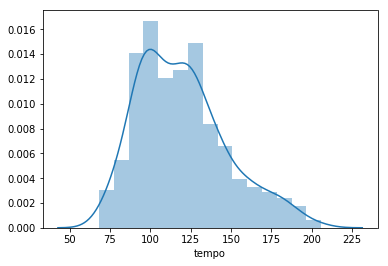

In [98]:
ax = sns.distplot(song_features_df['tempo'])
#bins=20

In [67]:
type(song_features_df.describe())

pandas.core.frame.DataFrame

In [84]:
tester = song_features_df[song_features_df['artist_name']=='Ariana Grande'].mean().values

In [91]:
np.append(5,tester)

array([ 5.000000e+00,  2.641000e-01,  6.779000e-01,  1.960747e+05,
        5.439000e-01,  1.786400e-05,  4.800000e+00,  1.822500e-01,
       -6.371000e+00,  5.000000e-01,  8.300000e+01,  1.119100e-01,
        1.222972e+02,  3.900000e+00,  3.758000e-01])

In [90]:
tester

array([ 2.641000e-01,  6.779000e-01,  1.960747e+05,  5.439000e-01,
        1.786400e-05,  4.800000e+00,  1.822500e-01, -6.371000e+00,
        5.000000e-01,  8.300000e+01,  1.119100e-01,  1.222972e+02,
        3.900000e+00,  3.758000e-01])

In [114]:
#list_of_names = top_songs['artist_name'].values

def mean_of_artist_columns_to_df(artists,song_df): 
    values = []
    for i in artists:
        the_mean = song_df[song_df['artist_name'] == i].mean()
        values.append(np.append(i, the_mean.values))
    column_name = np.append('artist_name', the_mean.index)
    return pd.DataFrame(values, columns=column_name)

In [133]:
list_of_names = female_artists_attributes['name'].values
mean_song_attri = mean_of_artist_columns_to_df(list_of_names,song_features_df)
mean_song_attri.to_csv('female_mean_song_attributes.csv')
col_names = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'song_popularity', 'speechiness', 'tempo', 'time_signature', 'valence']
mean_song_attri[col_names] = mean_song_attri[col_names].apply(pd.to_numeric)

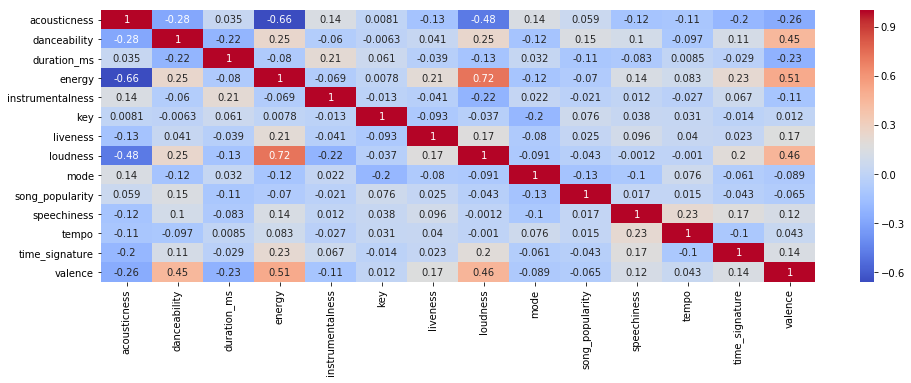

In [117]:
plt.figure(figsize = (16,5))
sns.heatmap(song_features_df.corr(), cmap="coolwarm", annot=True)
plt.show()

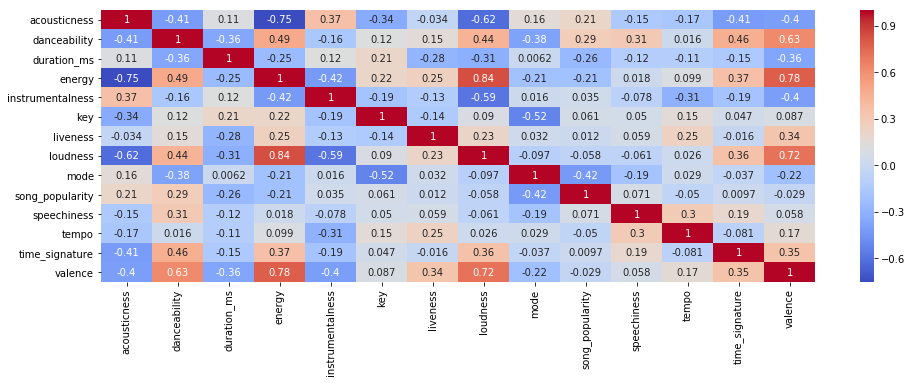

In [134]:
plt.figure(figsize = (16,5))
sns.heatmap(mean_song_attri.corr(), cmap="coolwarm", annot=True)
plt.show()

In [144]:
female_song_artist_attri = pd.concat([mean_song_attri, short_female_attributes], axis=1, join_axes=[short_female_attributes.index])

In [135]:
short_female_attributes = female_artists_attributes[['artist_popularity','followers','genres','name']]

In [147]:
female_song_artist_attri = female_song_artist_attri.drop(['name'],axis=1)

In [150]:
col_names_3 = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'song_popularity', 'speechiness', 'tempo', 'time_signature', 'valence',
       'artist_popularity', 'followers']
female_song_artist_attri[col_names_3] = female_song_artist_attri[col_names_3].apply(pd.to_numeric)

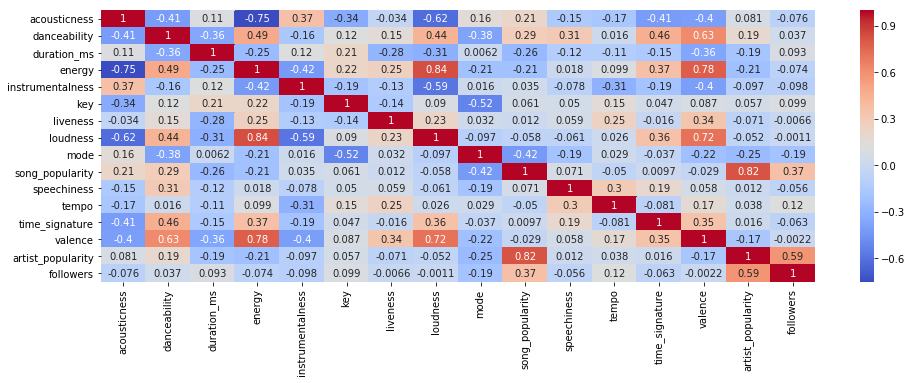

In [151]:
plt.figure(figsize = (16,5))
sns.heatmap(female_song_artist_attri.corr(), cmap="coolwarm", annot=True)
plt.show()

In [160]:
female_song_artist_attri

,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,song_popularity,speechiness,tempo,time_signature,valence,artist_popularity,followers,genres
0,Ariana Grande,0.264100,0.677900,196074.700000,0.543900,1.786400e-05,4.800000,0.182250,-6.371000,0.500000,83.000000,0.11191,122.297200,3.900000,0.375800,100,24256213,"[dance pop, pop, post-teen pop]"
1,Dua Lipa,0.069820,0.677700,216841.800000,0.696000,9.290300e-05,5.400000,0.162490,-5.567600,0.400000,79.600000,0.09695,118.473100,4.000000,0.438800,90,9427069,"[dance pop, pop, post-teen pop]"
2,Cardi B,0.043795,0.855100,224598.200000,0.629700,6.780000e-05,6.000000,0.198580,-6.384200,0.300000,79.600000,0.21076,132.545200,4.000000,0.441600,93,6653702,"[pop, rap]"
3,Taylor Swift,0.091219,0.670500,227173.400000,0.631200,1.832950e-04,4.700000,0.130410,-6.679300,0.700000,68.900000,0.08124,125.224800,4.000000,0.419190,89,17602063,"[dance pop, pop, post-teen pop]"
4,Camila Cabello,0.380300,0.615600,200546.000000,0.554800,6.776700e-05,1.500000,0.130790,-5.720000,0.700000,77.500000,0.10884,102.890700,4.000000,0.423800,86,8270200,"[dance pop, pop, post-teen pop, r&b]"
5,Rihanna,0.242409,0.677400,230261.100000,0.540800,9.132400e-05,6.400000,0.107050,-6.609700,0.500000,69.800000,0.09352,127.340500,3.900000,0.423400,90,29753106,"[dance pop, pop, post-teen pop, r&b, urban con..."
6,Sia,0.057270,0.534100,209528.100000,0.689900,2.279140e-04,6.500000,0.108520,-5.097400,0.400000,73.900000,0.09732,132.310500,4.100000,0.524070,88,10457538,"[australian dance, australian pop, dance pop, ..."
7,Demi Lovato,0.162388,0.569800,207907.400000,0.627700,3.086600e-05,6.400000,0.168300,-5.848500,0.500000,73.200000,0.07894,125.803600,3.800000,0.410000,86,12537322,"[dance pop, pop, post-teen pop, r&b]"
8,Nicki Minaj,0.112760,0.759300,206977.800000,0.756300,2.298000e-05,4.900000,0.195480,-4.694600,0.500000,76.900000,0.19717,111.155900,4.300000,0.544200,93,14250148,"[dance pop, hip pop, pop, pop rap, rap]"
9,Selena Gomez,0.080225,0.733000,211496.700000,0.665200,6.974000e-06,5.400000,0.138830,-5.266300,0.400000,74.300000,0.07531,107.907500,4.000000,0.485500,89,13557858,"[dance pop, pop, post-teen pop]"


In [165]:
iqr_song_features = song_features_df.quantile([0.25,0.75])

In [264]:
# iqr_song_features['acousticness'].values[1]
iqr_song_features

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,song_popularity,speechiness,tempo,time_signature,valence
0.25,0.03715,0.56775,191193.00,0.534,0.000000,1.0,0.092125,-7.00050,0.0,65.0,0.04115,97.4075,4.0,0.30275
0.75,0.34375,0.75000,231506.75,0.772,0.000026,8.0,0.206500,-4.57875,1.0,77.0,0.11700,136.0080,4.0,0.64125


In [176]:
iqr_song_features['acousticness']

0.25    0.03715
0.75    0.34375
Name: acousticness, dtype: float64

In [208]:
#iqr_fix_df.apply(lambda x: is_in_iqr(x, iqr_song_features))

In [272]:
def is_in_iqr(iqr,data):
    n_data = data
    for i in iqr:
        count = 1
        while count < len(n_data[i]):
            iqr_num = (iqr[i].values[1] - iqr[i].values[0])*1.5
            mean = n_data[i].mean()
            upper, lower = mean+iqr_num, mean-iqr_num
            n_data[i] = n_data[i].apply(lambda x: x if (x >= lower) and (x <= upper) else np.NaN)
            count += 1
    return n_data

In [273]:
df_testsss = is_in_iqr(iqr_song_features,tester_2)

/Users/elenasm7/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [192]:
iqr_song_features['acousticness'].values

0.25    0.03715
0.75    0.34375
Name: acousticness, dtype: float64

In [269]:
iqr_fix_df = song_features_df[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'song_popularity', 'speechiness', 'tempo', 'time_signature', 'valence']]

In [270]:
tester_2 = iqr_fix_df

In [ ]:
tester_2

In [282]:
new_song_feats_outliers = pd.concat([df_testsss,artists_from_songs],axis=1, join_axes=[df_testsss.index])

In [277]:
artists_from_songs = song_features_df['artist_name']

In [283]:
new_song_feats_outliers

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,song_popularity,speechiness,tempo,time_signature,valence,artist_name
0,0.60100,0.771,178627.0,0.320,NaN,1,0.0885,NaN,0,84.0,NaN,139.844,NaN,0.312,Ariana Grande
1,0.24000,0.735,207320.0,0.638,NaN,1,0.1020,-5.605,1,82.0,0.0785,107.016,NaN,0.402,Ariana Grande
2,0.03780,0.726,190440.0,0.545,NaN,5,0.1080,-5.489,0,NaN,0.1020,169.991,NaN,0.348,Ariana Grande
3,0.04000,0.699,205920.0,0.713,NaN,9,0.2940,-5.507,0,88.0,0.0594,121.993,NaN,0.354,Ariana Grande
4,0.36400,0.709,212267.0,0.474,NaN,8,0.1200,-4.890,1,82.0,0.0423,125.107,NaN,0.366,Ariana Grande
5,0.02110,0.568,198160.0,0.656,NaN,8,0.2130,-5.413,1,87.0,0.0433,100.049,NaN,0.364,Ariana Grande
6,NaN,0.607,171573.0,0.314,NaN,7,0.2010,-8.026,0,86.0,0.0372,86.990,NaN,0.169,Ariana Grande
7,0.02330,0.602,197547.0,0.658,NaN,1,0.2370,-5.934,1,86.0,0.0558,145.031,NaN,0.268,Ariana Grande
8,0.07380,0.765,216893.0,0.663,NaN,2,0.2060,-5.185,0,86.0,0.0886,151.979,NaN,0.633,Ariana Grande
9,0.45300,0.597,182000.0,0.458,NaN,6,0.2530,-6.909,1,59.0,NaN,74.972,NaN,0.542,Ariana Grande


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 50 Text xticklabel objects>)

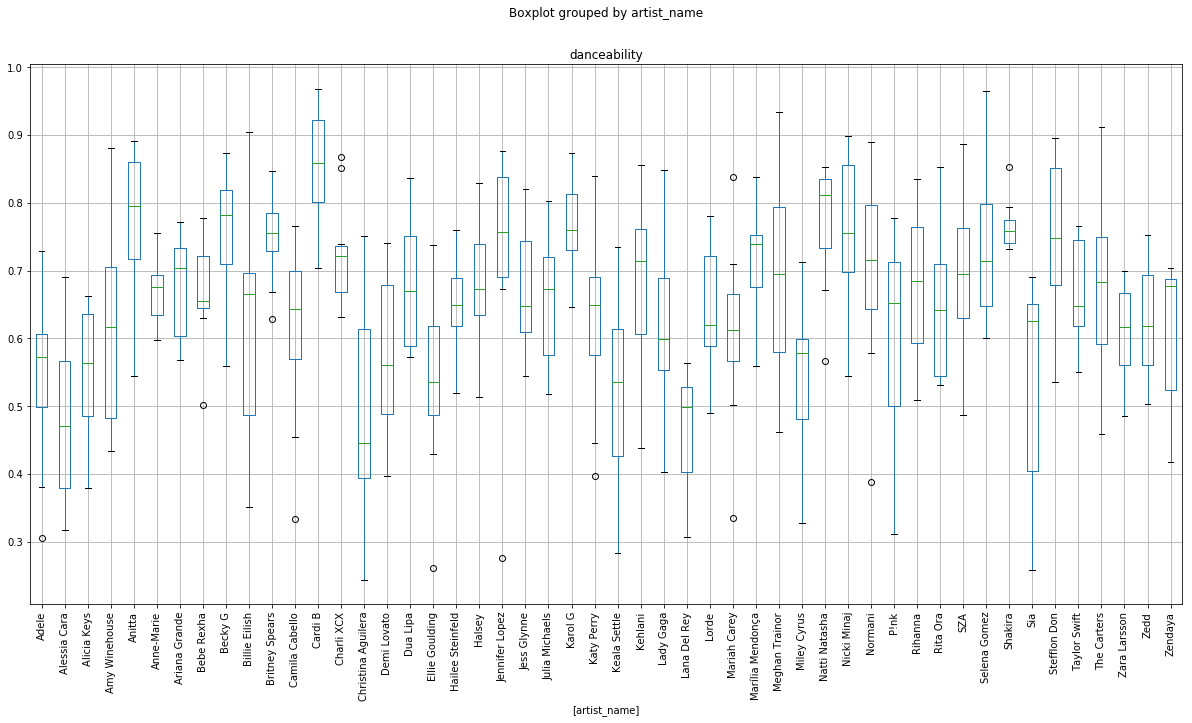

In [297]:
song_features_df[['danceability','artist_name']].boxplot(by='artist_name', figsize=(20,10))
plt.xticks(rotation=90)

In [298]:
from scipy.stats import normaltest
data = song_features_df['danceability']
stat, p = normaltest(data)
print(stat, p)

16.064054747392813 0.00032488886963416043


In [299]:
from scipy.stats import pearsonr
data1, data2 = song_features_df['danceability'],song_features_df['song_popularity']
corr, p = pearsonr(data1, data2)
print(corr, p)

0.1493107351473812 0.0008510502853917157
